In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv(r"C:\Users\insre\Downloads\titanic_dataset.csv")
df1.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
num_columns =df1[[  'Age', ]]
num_columns.isna().sum()

Age    177
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(num_columns)
num_columns = imputer.transform(num_columns)
num_columns = pd.DataFrame(num_columns,columns= [ 'Age'])
num_columns
num_columns.isna().sum()
df = df1.drop([ 'Age'], axis=1)
df = pd.concat([num_columns, df], axis =1)
df.isna().sum()

Age              0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mode')
imputer1 = imputer1.fit(num_columns)
num_columns = imputer1.transform(num_columns)
num_columns = pd.DataFrame(num_columns,columns= [ 'Embarked'])
num_columns
num_columns.isna().sum()
df = df1.drop([ 'Embarked'], axis=1)
df = pd.concat([num_columns, df], axis =1)
df.isna().sum()

Embarked         0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [37]:
df = df.drop('Cabin',axis=1)


In [38]:
df = df.drop('PassengerId',axis=1)


In [39]:
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.000000,0,3,1,1,0,7.2500,2
1,38.000000,1,1,0,1,0,71.2833,0
2,26.000000,1,3,0,0,0,7.9250,2
3,35.000000,1,1,0,1,0,53.1000,2
4,35.000000,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,27.000000,0,2,1,0,0,13.0000,2
887,19.000000,1,1,0,0,0,30.0000,2
888,29.699118,0,3,0,1,2,23.4500,2
889,26.000000,1,1,1,0,0,30.0000,0


In [41]:
y = df['Survived']
x = df.drop(['Survived',], axis =1)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size =0.20)

In [43]:
from sklearn.linear_model import LogisticRegression
log_regression =LogisticRegression()

model = log_regression.fit(x_train,y_train)
model
prediction = model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))
print('precision_score=:',precision_score(y_test,prediction))
print('recall_score=:',recall_score(y_test,prediction))
print('f1_score=:',f1_score(y_test,prediction))

accuracy_score=: 0.8100558659217877
precision_score=: 0.7857142857142857
recall_score=: 0.7432432432432432
f1_score=: 0.7638888888888888


In [53]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [54]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors = k ,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_prediction)
    metric_k.append(acc)

metric_k

[0.7150837988826816,
 0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7206703910614525,
 0.7262569832402235,
 0.7262569832402235,
 0.6983240223463687,
 0.7262569832402235,
 0.7039106145251397,
 0.7374301675977654,
 0.7150837988826816]

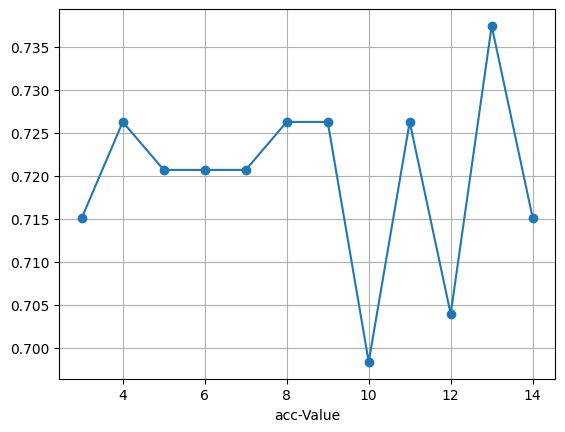

In [55]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K-Value")
plt.xlabel("acc-Value")
plt.grid()

In [57]:
classifier =KNeighborsClassifier(n_neighbors = 13 ,metric ='euclidean')
classifier.fit(x_train,y_train)
y_prediction = classifier.predict(x_test)
acc = accuracy_score(y_test, y_prediction)
metric_k.append(acc)
print('accuracy_score=:',accuracy_score(y_test,y_prediction))
print('precision_score=:',precision_score(y_test,y_prediction))
print('recall_score=:',recall_score(y_test,y_prediction))
print('f1_score=:',f1_score(y_test,y_prediction))

accuracy_score=: 0.7374301675977654
precision_score=: 0.7454545454545455
recall_score=: 0.5540540540540541
f1_score=: 0.6356589147286822


In [48]:
from sklearn.svm import SVC
svm_class = SVC(kernel='linear')
svm_class = svm_class.fit(x_train,y_train)
svm_class
prediction = svm_class.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))

accuracy_score=: 0.7821229050279329


In [49]:
from sklearn.svm import SVC
svm_class3 = SVC(kernel='rbf')
svm_class3 = svm_class3.fit(x_train,y_train)
svm_class3
prediction = svm_class3.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))

accuracy_score=: 0.659217877094972


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt =dt.fit(x_train,y_train)
prediction = dt.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))

accuracy_score=: 0.776536312849162


In [51]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt =dt.fit(x_train,y_train)
prediction = dt.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score=:',accuracy_score(y_test,prediction))


accuracy_score=: 0.8100558659217877


In [29]:
# final values


accuracy_score=: 0.956140350877193
